In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager

from sklearn import svm

In [3]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
# 模拟数据产生
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# 产生训练数据
X = 0.3 * np.random.randn(100, 2)  # x shape:(100,2)
X_train = np.r_[X + 2, X - 2]  # X_train shape:(200,2)
# 产测试数据
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# 产生一些异常点数据
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))  # x_outliers shape:(20,2)

In [5]:
# 模型训练
clf = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.01, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [7]:
# 预测结果获取
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
# 返回1表示属于这个类别，-1表示不属于这个类别
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
# 对于异常点来说，被判断为正例才真的有问题
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
print('error train:', n_error_train, '\nerror test:', n_error_test, '\nerror outliers', n_error_outliers)

error train: 5 
error test: 0 
error outliers 0


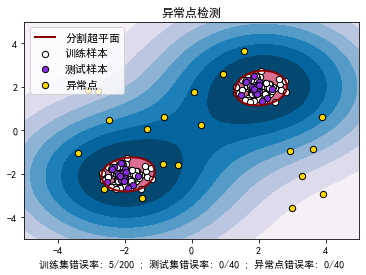

In [15]:
# 获取绘图的点信息
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 画图
plt.figure(facecolor='w')
plt.title("异常点检测")
# 画出区域图
# (Z.min(), 0, 9)  从Z.min到0划分9个等级
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 9), cmap=plt.cm.PuBu)
# 绘制最中间的暗红色边界
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# 会中中心的红色区域
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

# 画出点图
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s, edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s, edgecolors='k')

# 设置相关信息
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["分割超平面", "训练样本", "测试样本", "异常点"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel("训练集错误率: %d/200 ; 测试集错误率: %d/40 ; 异常点错误率: %d/40" \
           % (n_error_train, n_error_test, n_error_outliers))
plt.show()